# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset Source**: [Kaggle - Predictive Maintenance Oil and Gas Pipeline](https://www.kaggle.com/datasets/muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data/data)

**Data Features**  
Each row in the dataset corresponds to a specific pipeline segment or instance and includes the following:

- **Pipe Size**: Diameter of the pipeline
- **Thickness**: Measured wall thickness of the pipe
- **Material**: Type of material used (e.g., steel, composite)
- **Maximum Pressure**: Peak pressure experienced (psi)
- **Temperature**: Internal fluid temperature (°C)
- **Corrosion Impact Percentage**: Estimated corrosion level (%)
- **Thickness Loss**: Loss of wall thickness due to wear or corrosion
- **Material Loss Percentage**: Percentage of overall material loss
- **Year Times**: Age or time in service (years)
- **Conditions**: Operational condition category (Normal, Moderate, Critical)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
# Library Utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Pembantu
import os
import re

# Mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

# Library pemrosesan data
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
data = pd.read_csv("dataset_raw/market_pipe_thickness_loss_dataset.csv")
data.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


Data terdiri dari 1000 baris dengan 8 fitur bertipe number (float & int) dan 3 fitur bertipe object.

In [7]:
# deklarasi fitur numerik
num_feature = data.select_dtypes(include=['number'])

# deklarasi fitur kategorikal
cat_feature = data.select_dtypes(include=['object'])

# Menampilkan nama fitur
print(f"fitur numerikal = {num_feature.columns.tolist()}")
print(f"fitur kategorikal = {cat_feature.columns.tolist()}")

fitur numerikal = ['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years']
fitur kategorikal = ['Material', 'Grade', 'Condition']


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pipe_Size_mm,1000.0,522.00000,443.703587,50.00,150.0000,300.000,800.0000,1500.00
Thickness_mm,1000.0,16.07353,10.548358,3.00,7.3575,12.930,23.0275,49.53
Max_Pressure_psi,1000.0,1004.10000,812.843099,150.00,300.0000,900.000,1500.0000,2500.00
Temperature_C,1000.0,42.59560,41.127071,-50.00,13.4000,41.200,69.1500,149.70
Corrosion_Impact_Percent,1000.0,9.74599,5.817492,0.00,4.4925,9.720,14.8325,20.00
Thickness_Loss_mm,1000.0,4.88630,2.901123,0.01,2.3650,4.915,7.4325,9.99
Material_Loss_Percent,1000.0,46.74756,46.602553,0.08,15.6650,31.660,61.0350,318.75
Time_Years,1000.0,12.96100,7.135993,1.00,7.0000,13.000,19.0000,25.00


In [9]:
data.describe(include='object').T

,count,unique,top,freq
Material,1000,5,Fiberglass,219
Grade,1000,5,ASTM A333 Grade 6,228
Condition,1000,3,Critical,487


Sekilas secara statistik dapat dilihat datanya mayoritas terkumpul di suatu titik (perlu validasi visual), ada beberapa fitur dengan nilai min dan max yang cukup jauh dari distribusi (perlu di cek lebih lanjut apakah outlier atau bukan), tetapi dari nilainya masih masuk akal jadi tidak perlu diubah-ubah atau dihapus.

In [10]:
# Periksa nilai unik pada fitur kategorikal
for col in cat_feature.columns:
    print(f"Nilai unik untuk {col}: {cat_feature[col].unique()}")

Nilai unik untuk Material: ['Carbon Steel' 'PVC' 'HDPE' 'Fiberglass' 'Stainless Steel']
Nilai unik untuk Grade: ['ASTM A333 Grade 6' 'ASTM A106 Grade B' 'API 5L X52' 'API 5L X42'
 'API 5L X65']
Nilai unik untuk Condition: ['Moderate' 'Critical' 'Normal']


In [11]:
# Cek Missing Value
data.isna().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

In [12]:
# Cek Data Duplikat
data.duplicated().sum()

np.int64(0)

Data tidak memiliki missing value dan duplikat karena data pembelajaran tergolong bersih jadi tidak perlu dilakukan cleaning data.

In [13]:
# Fungsi menampilkan distribusi fitur
def plot_feature_distributions(data, feature_columns):
    """
    Menampilkan histogram distribusi untuk fitur
    """
    n_cols = 4
    bins = 20
    num_vars = len(feature_columns)
    n_rows = -(-num_vars // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(feature_columns):
        data[column].hist(ax=axes[i], bins=bins, edgecolor='black')
        axes[i].set_title(f'Distribusi: {column}')
        axes[i].set_xlabel('Nilai')
        axes[i].set_ylabel('Frekuensi')
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)
    # Menghapus subplot yang kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

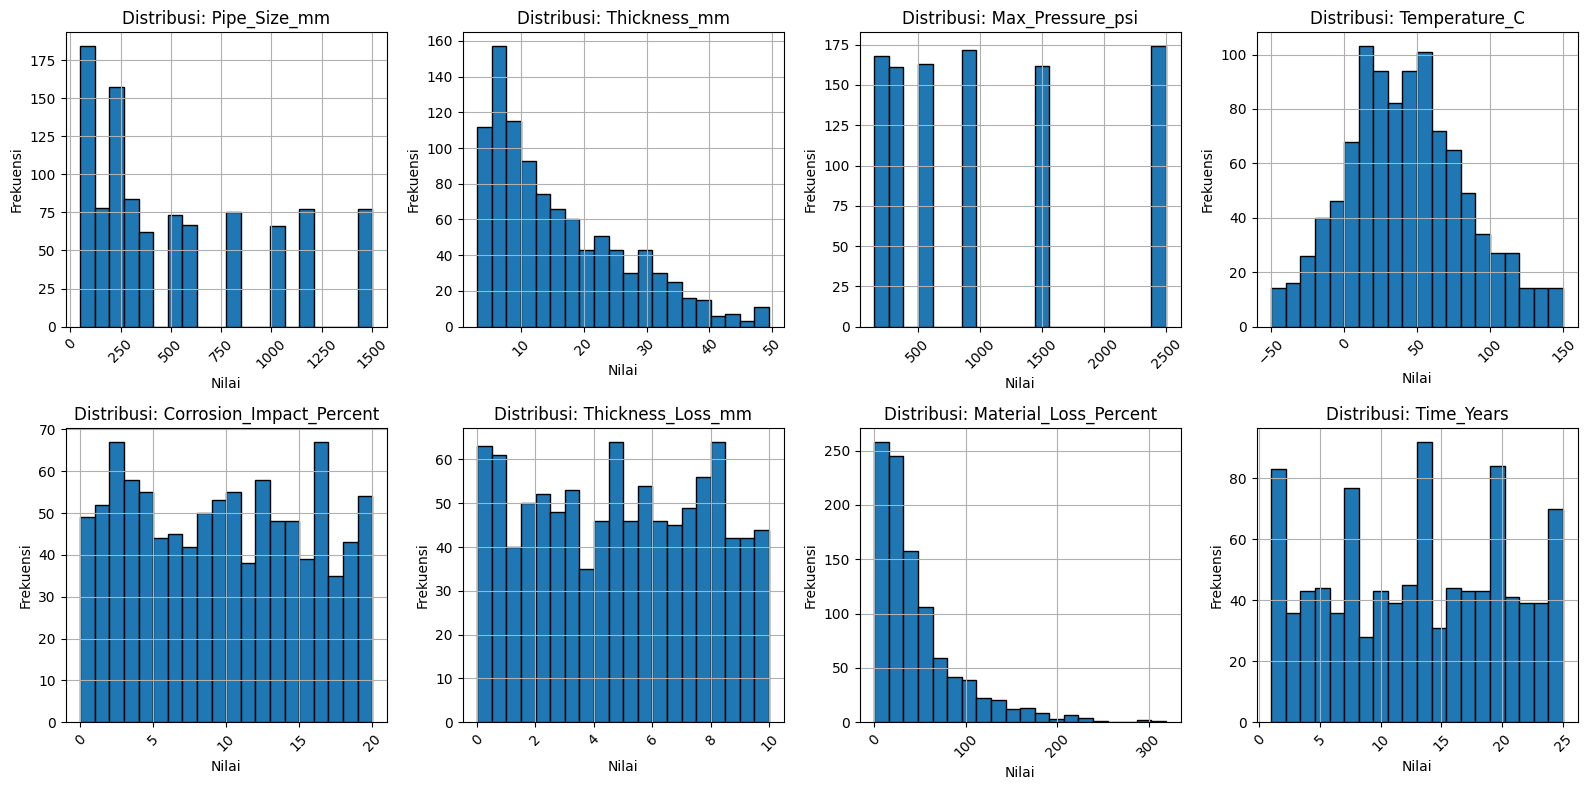

In [14]:
# Distribusi fitur numerikal
plot_feature_distributions(data, num_feature.columns)

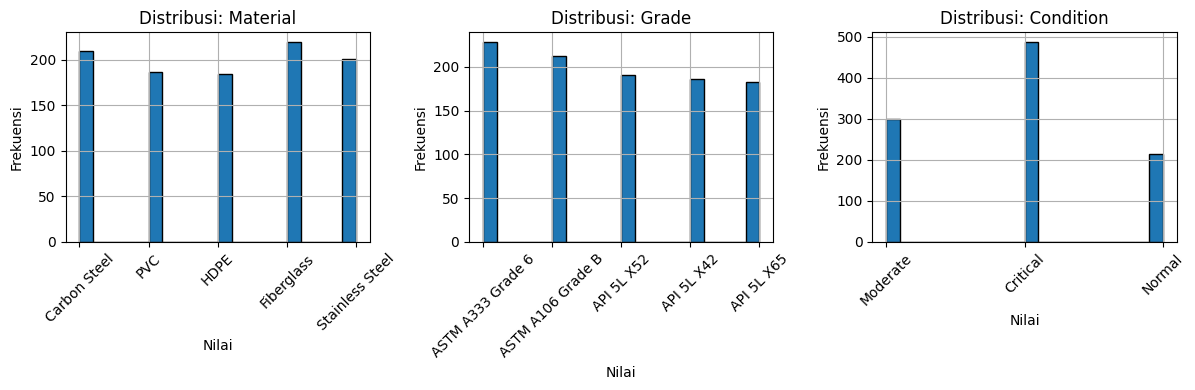

In [15]:
# Distribusi fitur kategorikal
plot_feature_distributions(data, cat_feature.columns)

Pada fitur numerikal beberapa data distribusinya sudah baik. Namun, ada beberapa data yang memang dominan di satu bagian (ini mungkin akan mengakibatkan terdeteksi sebagai outlier), ada beberapa data juga yang distribusinya skewed, akan coba diatasi dengan melakukan transformasi data untuk menormalkan distribusinya. Sedangkan pada fitur kategorikal distribusi memang tidak seimbang namun tidak terlalu berbeda jauh, sedangkan pada condition yang merupakan target memiliki distribusi kelas yang dominan pada critical namun masih tergolong ringan sehingga mungkin perlu dilatih dengan pembagian bobot (weighting) atau sampling jika diperlukan (jika model kurang baik).

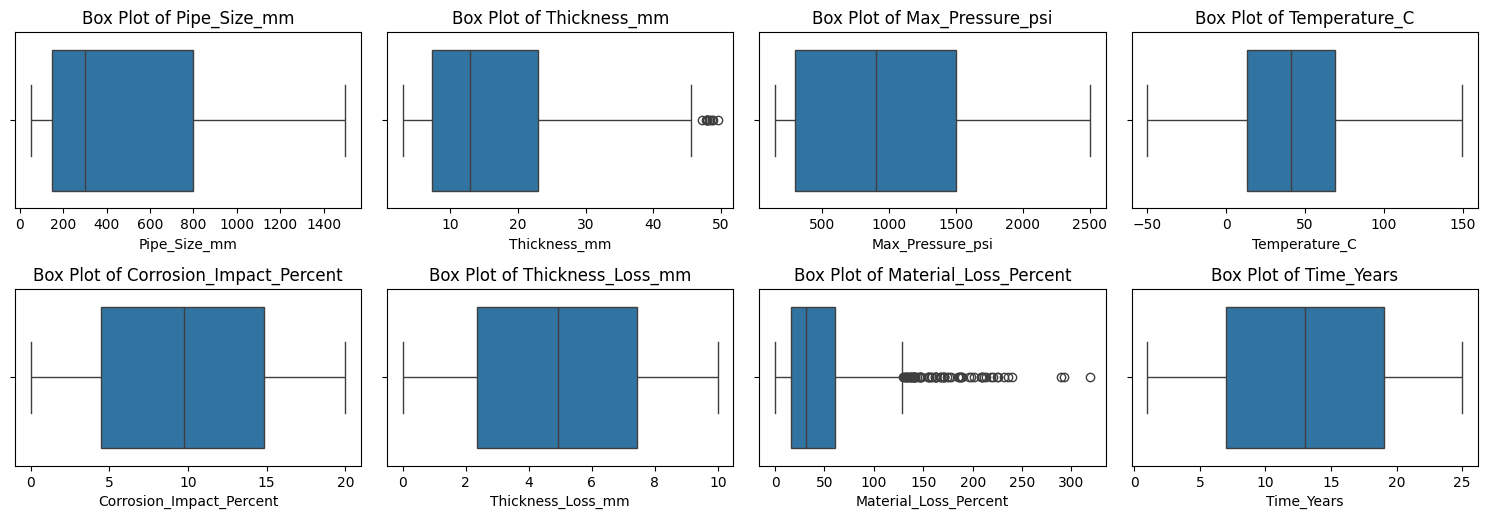

In [16]:
num_plots = len(num_feature)
n_cols, n_rows = 4 , 4

# Buat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Iterasi membuat box plot
for i, fitur in enumerate(num_feature):
    sns.boxplot(x=data[fitur], ax=axes[i])
    axes[i].set_title(f'Box Plot of {fitur}')
    axes[i].set_xlabel(fitur)

# Hapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
# fungsi untuk deteksi outliers
def deteksi_outliers(df, fitur):
    for col in fitur:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        prop = (count / len(df)) * 100

        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")

deteksi_outliers(data, num_feature)

Fitur Pipe_Size_mm: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Thickness_mm: Jumlah outliers = 11, Proporsi = 1.10%
Fitur Max_Pressure_psi: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Temperature_C: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Corrosion_Impact_Percent: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Thickness_Loss_mm: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Material_Loss_Percent: Jumlah outliers = 70, Proporsi = 7.00%
Fitur Time_Years: Jumlah outliers = 0, Proporsi = 0.00%


Setelah dilihat menggunakan boxplot dan deteksi dengan IQR terlihat data yang skewed terdeteksi sebagai outlier namun masih sangat ringan, untuk mengatasinya akan dicoba dengan transformasi data agar tidak membuang data.

In [18]:
# Encoding untuk keperluan EDA
data_EDA = data.copy()

# One-hot encoding untuk fitur kategorikal
onehot_material = pd.get_dummies(data_EDA['Material'], prefix='Material')
onehot_grade = pd.get_dummies(data_EDA['Grade'], prefix='Grade')

# Gabungkan data
data_EDA = pd.concat([data_EDA.drop(columns=['Material', 'Grade']), onehot_material, onehot_grade], axis=1)

# Ubah tipe data hasil encoding
for col in onehot_material.columns:
    data_EDA[col] = data_EDA[col].astype(int)
for col in onehot_grade.columns:
    data_EDA[col] = data_EDA[col].astype(int)

# Tampilkan hasil
data_EDA.head()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6
0,800,15.48,300,84.9,16.04,4.91,31.72,2,Moderate,1,0,0,0,0,0,0,0,0,1
1,800,22.00,150,14.1,7.38,7.32,33.27,4,Critical,0,0,0,1,0,0,0,0,1,0
2,400,12.05,2500,0.6,2.12,6.32,52.45,7,Critical,1,0,0,0,0,0,1,0,0,0
3,1500,38.72,1500,52.7,5.58,6.20,16.01,19,Critical,1,0,0,0,0,1,0,0,0,0
4,1500,24.32,1500,11.7,12.29,8.58,35.28,20,Critical,0,0,1,0,0,0,0,1,0,0


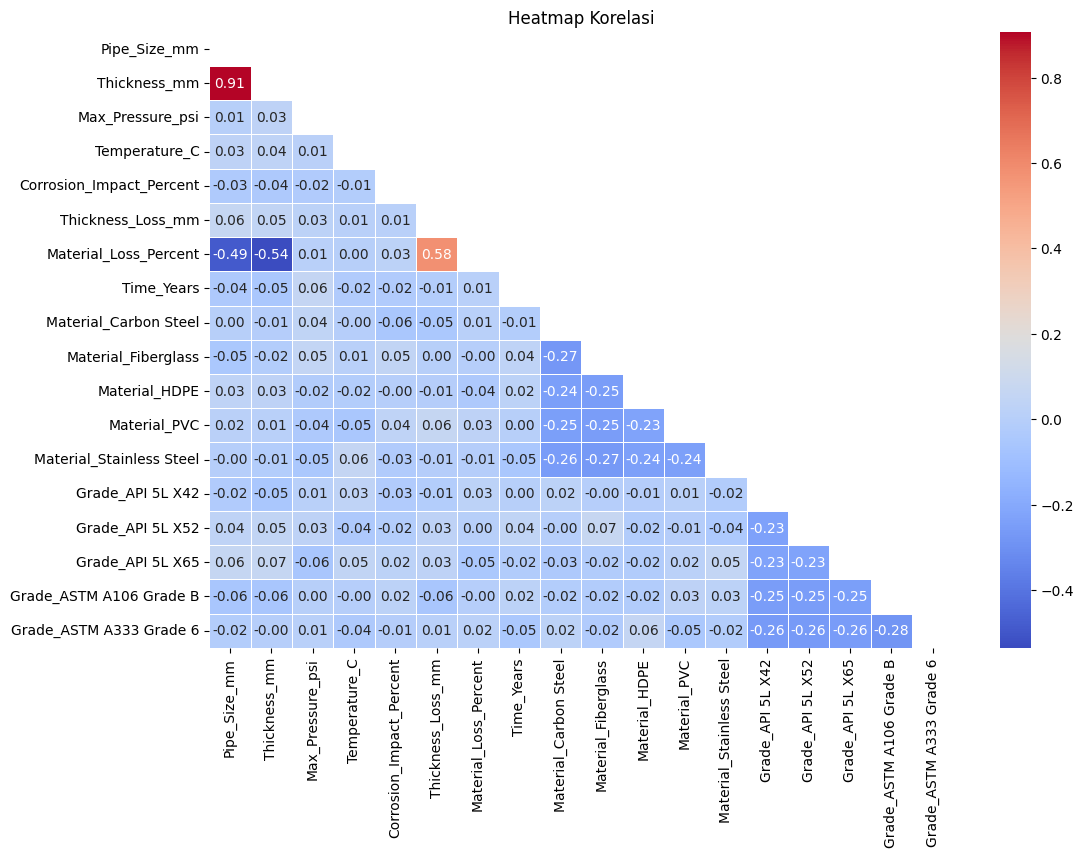

In [19]:
def plot_correlation_heatmap(feature):
    plt.figure(figsize=(12, 8))
    correlation_matrix = feature.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

    plt.title('Heatmap Korelasi')
    plt.show()

# Heatmap korelasi fitur dengan target
plot_correlation_heatmap(data_EDA.drop('Condition', axis=1))

Dilihat dari heatmap fitur thickness_mm dengan pipe_size_mm sangat multikolinearitas menunjukan redundansi antara kedua fitur sehingga akan dilakukan feature selection dengan memilih fitur thickness_mm saja karena ketebalan pipa yang berpengaruh besar terkait kondisi. Adapun fitur fitur lain ada beberapa yang yang berkolerasi namun tidak terlalu parah.

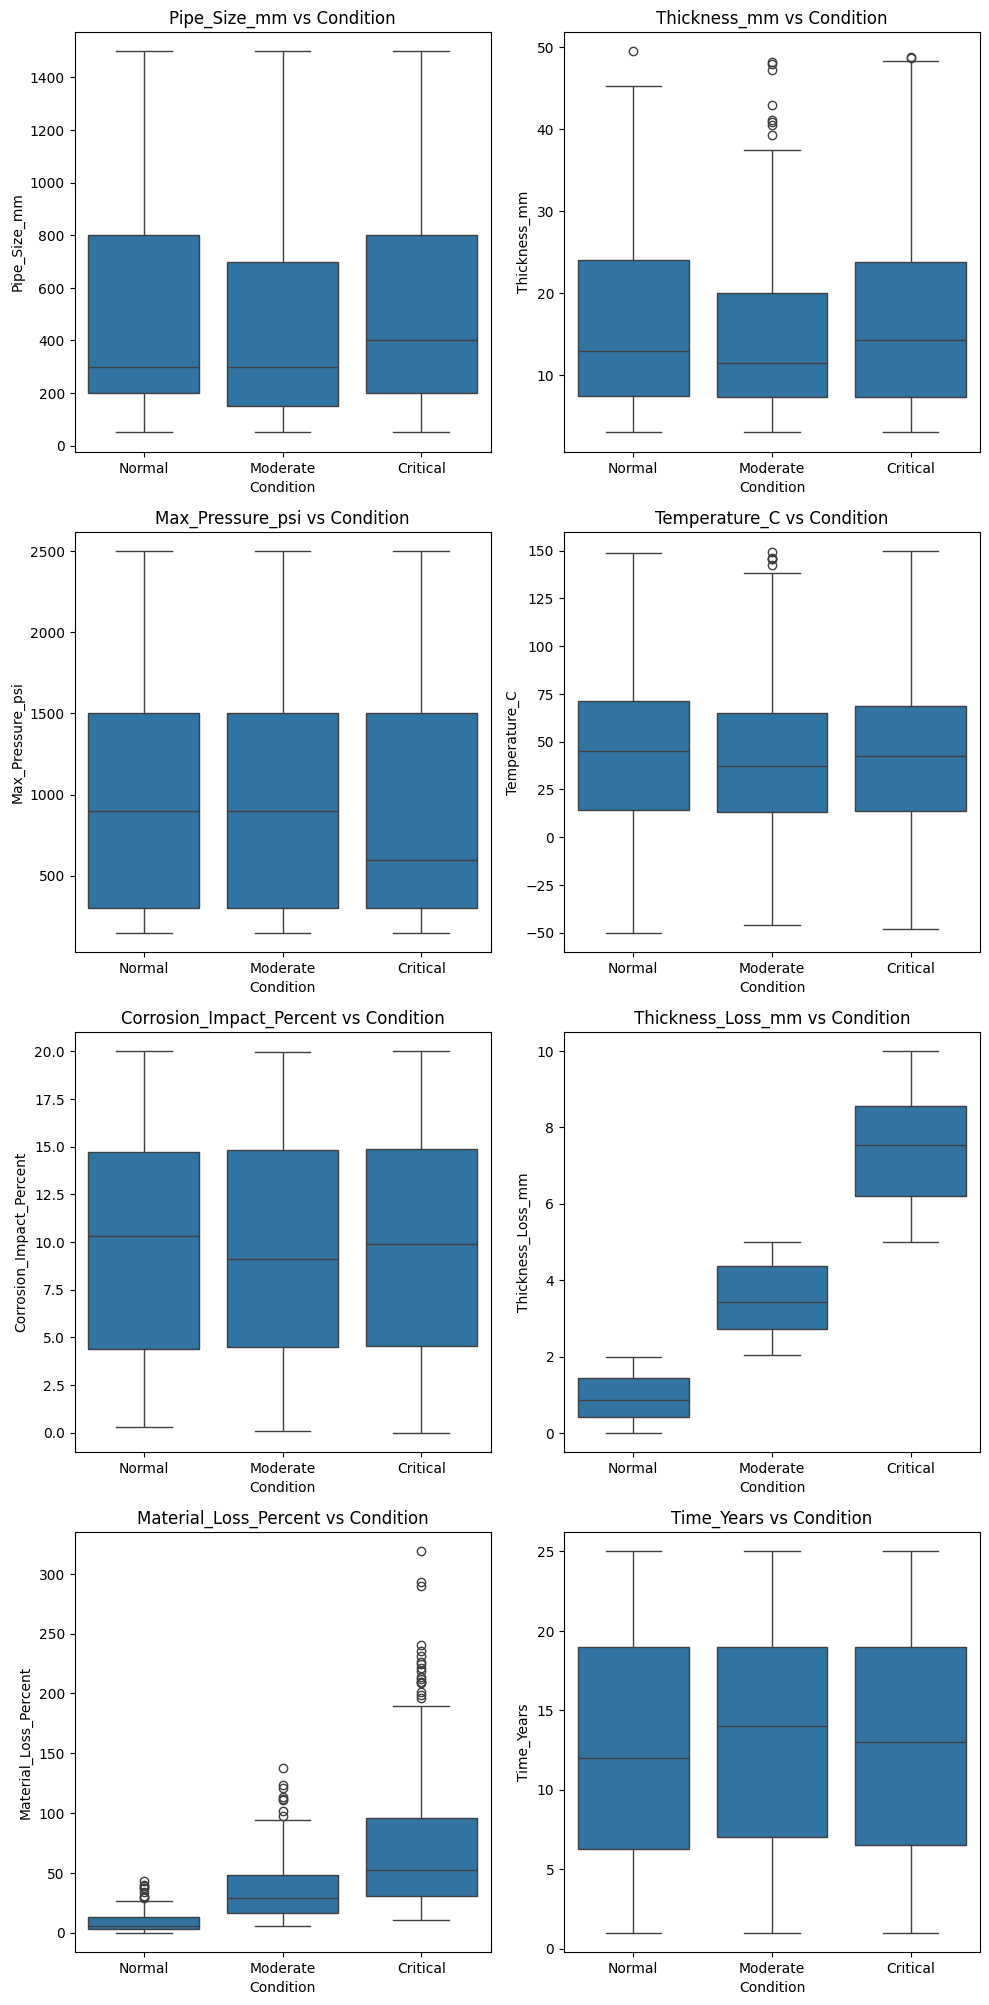

In [20]:
# Visualisasi hubungan fitur numerik dengan target
n_cols = 2
num_vars = len(num_feature)
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_feature):
    sns.boxplot(x='Condition', y=col, data=data, ax=axes[i], order=['Normal', 'Moderate', 'Critical'])
    axes[i].set_title(f'{col} vs Condition')
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel(col)

# Menghapus subplot yang kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Pada hubungan fitur numerikal dengan target dapat dilihat bahwa thickness_loss dan material_loss yang menunjukkan perbedaan antar kelas.

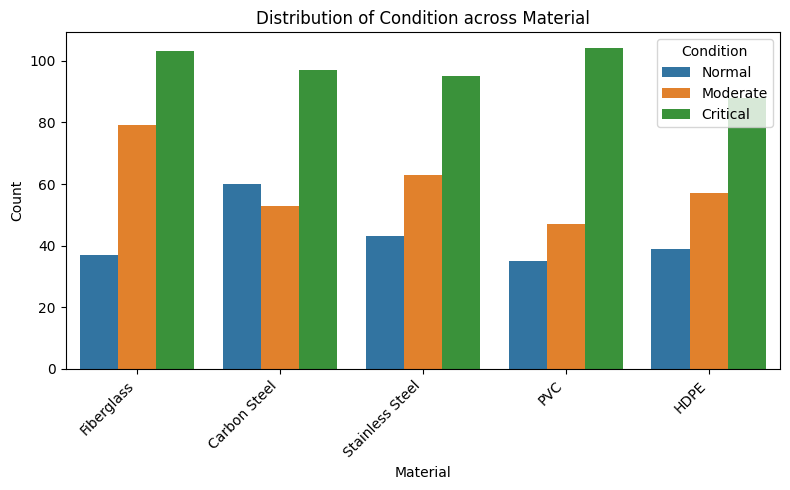

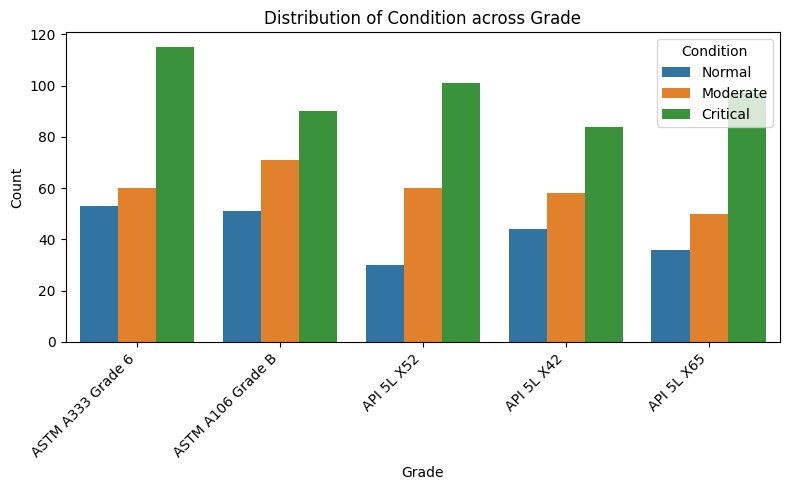

In [21]:
# Visualisasi hubungan fitur kategorikal asli dengan target
cat_features_eda = ['Material', 'Grade']
for col in cat_features_eda:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Condition', data=data, order=data[col].value_counts().index, hue_order=['Normal', 'Moderate', 'Critical'])
    plt.title(f'Distribution of Condition across {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Dilihat dari hubungan fitur kategorikal dengan target dapat dilihat bahwa setiap grade dan material memiliki pengaruh yang sama terhadap kondisi tidak ada yang sangat dominan (perbedaan tidak terlalu jauh).

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Drop Feature

In [22]:
# Menghapus fitur yang redundan
data = data.drop('Pipe_Size_mm', axis=1)

# Update numerical feature column
num_feature = data.select_dtypes(include=['number'])

Alasan mempertahankan Thickness_mm karena memiliki relevansi langsung dengan kondisi pipa dan sifatnya dinamis (dapat terjadi perubahan karena korosi).

## Feature Transform

Distribusi Sebelum Transformasi:


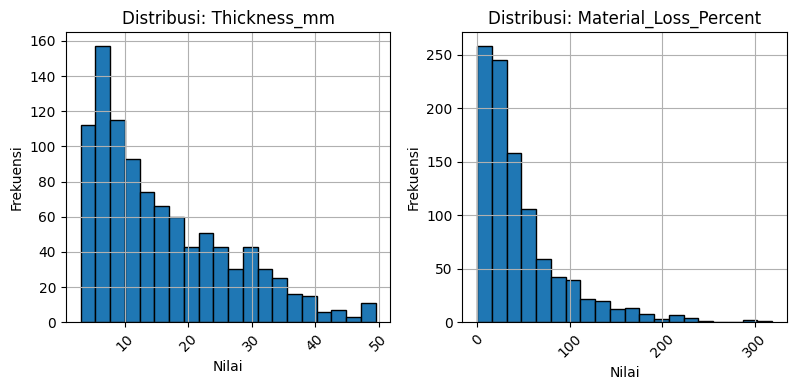


Distribusi Setelah Transformasi:


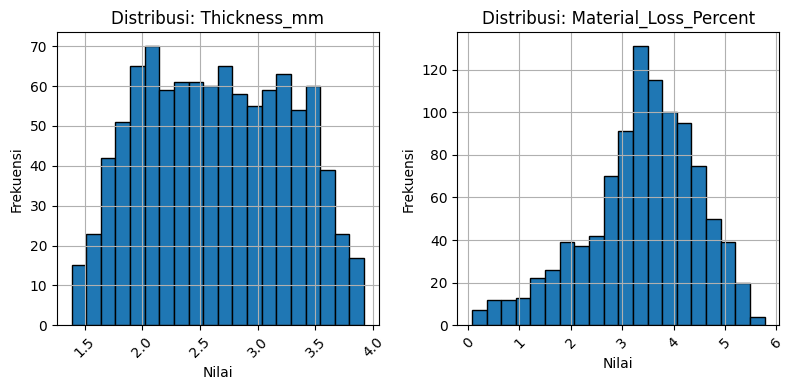


Jumlah Outlier Setelah Transformasi:
Fitur Thickness_mm: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Max_Pressure_psi: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Temperature_C: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Corrosion_Impact_Percent: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Thickness_Loss_mm: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Material_Loss_Percent: Jumlah outliers = 28, Proporsi = 2.80%
Fitur Time_Years: Jumlah outliers = 0, Proporsi = 0.00%


In [23]:
def apply_transform(df, columns):
    """
    Menerapkan transformasi log1p pada kolom yang ditentukan dalam DataFrame.
    """
    transformer = FunctionTransformer(np.log1p)
    df_transformed = df.copy()
    for col in columns:
        if (df_transformed[col] < -1).any():
            raise ValueError(f"Kolom {col} memiliki nilai < -1, tidak bisa diterapkan log1p.")
        df_transformed[col] = transformer.transform(df_transformed[[col]])
    return df_transformed, transformer

# Menampilkan distribusi sebelum transformasi
print("Distribusi Sebelum Transformasi:")
plot_feature_distributions(data, ['Thickness_mm', 'Material_Loss_Percent'])

# Menerapkan transformasi menggunakan fungsi
data, transformer = apply_transform(data, ['Thickness_mm', 'Material_Loss_Percent'])

# Menampilkan distribusi dan outlier setelah transformasi
print("\nDistribusi Setelah Transformasi:")
plot_feature_distributions(data, ['Thickness_mm', 'Material_Loss_Percent'])
print("\nJumlah Outlier Setelah Transformasi:")
deteksi_outliers(data, num_feature)

Distribusi sudah mendekati normal dan outlier berkurang signifikan.

## Data Splitting

Splitting dilakukan sebelum scaling dan encoding untuk mencegah data leakage dan mencoba mencerminkan real-world data.

In [24]:
def data_splitting(df, target_column, test_size=0.2):
    """
    Melakukan splitting data dengan stratified sampling.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=42,
                                                        stratify=y)

    return X_train, X_test, y_train, y_test

# Memanggil Fungsi Splitting
X_train, X_test, y_train, y_test = data_splitting(data, 'Condition')

# Menampilkan jumlah data hasil splitting
print(f"Jumlah data train: {X_train.shape}")
print(f"Jumlah data test: {X_test.shape}")

Jumlah data train: (800, 9)
Jumlah data test: (200, 9)


## Data Scaling

In [25]:
def scaling_feature(X_train, X_test):
    """
    Melakukan MinMax scaling hanya pada fitur numerik dalam X_train dan X_test.
    """
    scaler = MinMaxScaler()

    num_feature = X_train.select_dtypes(include=['number'])
    # Scaling fitur numerik
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_feature.columns]),
                                        columns=num_feature.columns, index=X_train.index)

    X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_feature.columns]),
                                      columns=num_feature.columns, index=X_test.index)

    # Gabungkan kembali
    cat_feature = X_train.select_dtypes(include=['object'])
    X_train_scaled = pd.concat([X_train_scaled, X_train[cat_feature.columns]], axis=1)
    X_test_scaled = pd.concat([X_test_scaled, X_test[cat_feature.columns]], axis=1)


    return X_train_scaled, X_test_scaled, scaler

# Lakukan Scaling
X_train, X_test, scaler = scaling_feature(X_train, X_test)

print("x_train after scaling:")
display(X_train.head())
print("\nx_test after scaling:")
display(X_test.head())

x_train after scaling:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material,Grade
502,0.173430,0.000000,0.708228,0.2915,0.132265,0.571016,0.958333,Stainless Steel,API 5L X65
465,0.438707,0.574468,0.828370,0.8965,0.080160,0.362670,0.583333,HDPE,ASTM A333 Grade 6
694,0.691555,0.000000,0.902070,0.1240,0.765531,0.623469,0.458333,PVC,ASTM A106 Grade B
401,0.911101,0.063830,0.178193,0.3390,0.312625,0.377395,0.750000,HDPE,ASTM A333 Grade 6
677,0.880941,0.063830,0.515396,0.7535,0.332665,0.399814,0.125000,PVC,ASTM A333 Grade 6



x_test after scaling:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material,Grade
550,0.654180,0.319149,0.330641,0.4785,0.107214,0.317100,0.250000,Stainless Steel,API 5L X65
998,0.547817,0.191489,0.435639,0.3300,0.539078,0.629431,0.458333,HDPE,API 5L X42
195,0.869375,0.319149,0.626956,0.0215,0.042084,0.128523,0.166667,Fiberglass,API 5L X65
865,0.689845,0.319149,0.289753,0.0815,0.128257,0.329760,0.541667,Carbon Steel,ASTM A333 Grade 6
208,0.210951,0.000000,0.338718,0.8370,0.004008,0.096964,0.166667,PVC,API 5L X42


## Data Encoding

In [26]:
def onehot_encoding(X_train, X_test, categorical_cols):
    """
    Melakukan one-hot encoding pada fitur-fitur kategorikal dalam data train dan test.
    """
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    encoders = {}

    for col in categorical_cols:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

        # Fit dan transform di data train
        col_encoded_train = encoder.fit_transform(X_train_encoded[[col]])
        col_names_raw = encoder.get_feature_names_out([col])

        # Normalisasi nama kolom hasil encoding
        col_names_cleaned = [re.sub(r'\W+', '_', name) for name in col_names_raw]

        # Transform di data test
        col_encoded_test = encoder.transform(X_test_encoded[[col]])

        # Ubah hasil encoding menjadi DataFrame dengan nama kolom yang sudah dibersihkan
        col_encoded_train_df = pd.DataFrame(col_encoded_train, columns=col_names_cleaned, index=X_train_encoded.index)
        col_encoded_test_df = pd.DataFrame(col_encoded_test, columns=col_names_cleaned, index=X_test_encoded.index)

        # Gabungkan dengan data train dan test yang sudah ada
        X_train_encoded = pd.concat([X_train_encoded.drop(columns=[col]), col_encoded_train_df], axis=1)
        X_test_encoded = pd.concat([X_test_encoded.drop(columns=[col]), col_encoded_test_df], axis=1)

        # Simpan encoder untuk kolom ini
        encoders[col] = encoder

    return X_train_encoded, X_test_encoded, encoders

# Lakukan onehot Encoding
categorical_features = ['Material', 'Grade']
X_train, X_test, onehot_encoders = onehot_encoding(X_train, X_test, categorical_features)

# Menampilkan hasil
print("X_train after one-hot encoding:")
display(X_train.head())
print("\nX_test after one-hot encoding:")
display(X_test.head())

X_train after one-hot encoding:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material_Carbon_Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless_Steel,Grade_API_5L_X42,Grade_API_5L_X52,Grade_API_5L_X65,Grade_ASTM_A106_Grade_B,Grade_ASTM_A333_Grade_6
502,0.173430,0.000000,0.708228,0.2915,0.132265,0.571016,0.958333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
465,0.438707,0.574468,0.828370,0.8965,0.080160,0.362670,0.583333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
694,0.691555,0.000000,0.902070,0.1240,0.765531,0.623469,0.458333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
401,0.911101,0.063830,0.178193,0.3390,0.312625,0.377395,0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
677,0.880941,0.063830,0.515396,0.7535,0.332665,0.399814,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



X_test after one-hot encoding:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material_Carbon_Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless_Steel,Grade_API_5L_X42,Grade_API_5L_X52,Grade_API_5L_X65,Grade_ASTM_A106_Grade_B,Grade_ASTM_A333_Grade_6
550,0.654180,0.319149,0.330641,0.4785,0.107214,0.317100,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,0.547817,0.191489,0.435639,0.3300,0.539078,0.629431,0.458333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
195,0.869375,0.319149,0.626956,0.0215,0.042084,0.128523,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
865,0.689845,0.319149,0.289753,0.0815,0.128257,0.329760,0.541667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
208,0.210951,0.000000,0.338718,0.8370,0.004008,0.096964,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
def label_encode_target(y_train, y_test):
    """
    Melakukan label encoding pada target klasifikasi dengan urutan label yang ditentukan.
    """
    condition_order = ['Normal', 'Moderate', 'Critical']
    label_encoder = LabelEncoder()
    label_encoder.fit(condition_order)

    # Transform y_train dan y_test
    y_train_encoded = pd.Series(label_encoder.transform(y_train), index=y_train.index, name='Condition')
    y_test_encoded = pd.Series(label_encoder.transform(y_test), index=y_test.index, name='Condition')

    return y_train_encoded, y_test_encoded, label_encoder

# Lakukan Label Encoding target
y_train, y_test, encoder = label_encode_target(y_train, y_test)

print("y_train after label encoding:")
display(y_train.head())
print("\ny_test after label encoding:")
display(y_test.head())

y_train after label encoding:


502    2
465    2
694    0
401    1
677    1
Name: Condition, dtype: int64


y_test after label encoding:


550    2
998    0
195    2
865    2
208    2
Name: Condition, dtype: int64

Setelah Scaling dan encoding dihasilkan fitur yang siap digunakan dengan rentang 0-1 dengan jumlah fitur total 17, dan di splitting dengan stratified sampling agar distribusi targetnya seimbang. Data siap digunakan untuk training :)

# Menyimpan Hasil Preprocessing

In [28]:
# Simpan ke file CSV dalam folder preprocessed_data_manual
# buat folder jika belum ada
os.makedirs('preprocessed_data_manual', exist_ok=True)
X_train.to_csv('preprocessed_data_manual/X_train_preprocessed.csv', index=False)
X_test.to_csv('preprocessed_data_manual/X_test_preprocessed.csv', index=False)
y_train.to_csv('preprocessed_data_manual/y_train_preprocessed.csv', index=False)
y_test.to_csv('preprocessed_data_manual/y_test_preprocessed.csv', index=False)